# 第4章 情報量基準

## 4.1 情報量規準

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn

/home/yuma/.cache/pypoetry/virtualenvs/statistical-learning-with-python-gf79ENdJ-py3.6/lib/python3.6/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
from sklearn.linear_model import LinearRegression
import itertools  # 組合わせを列挙する

In [3]:
res = LinearRegression()

In [4]:
def RSS_min(X, y, T):
    S_min = np.inf
    m = len(T)
    for j in range(m):
        q = T[j]
        res.fit(X[:, q], y)
        y_hat = res.predict(X[:, q])
        S = np.linalg.norm(y_hat - y)**2
        if S < S_min:
            S_min = S
            set_q = q
    return (S_min, set_q)

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()
X = boston.data[:, [0, 2, 4, 5, 6, 7, 9, 10, 11, 12]]
y = boston.target

In [7]:
n, p = X.shape
AIC_min = np.inf
for k in range(1, p + 1, 1):
    T = list(itertools.combinations(range(p), k))
    # p個からk個を選ぶ組合わせを各列にもつ
    S_min, set_q = RSS_min(X, y, T)
    AIC = n * np.log(S_min) + 2 * k  ##
    if AIC < AIC_min:
        AIC_min = AIC
        set_min = set_q
print(AIC_min, set_min)

4770.415163216072 (0, 2, 3, 5, 7, 8, 9)


In [8]:
y_bar = np.mean(y)
TSS = np.linalg.norm(y - y_bar)**2

In [9]:
D_max = -np.inf
for k in range(1, p + 1, 1):
    T = list(itertools.combinations(range(p), k))
    S_min, set_q = RSS_min(X, y, T)
    D = 1 - (S_min / (n - p - 1)) / (TSS * (n - 1))
    if D > D_max:
        D_max = D
        set_max = set_q
print(D_max, set_q)

0.9999988717090253 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)


In [10]:
def IC(X, y, k):
    n, p = X.shape
    T = list(itertools.combinations(range(p), k))
    S, set_q = RSS_min(X, y, T)
    AIC = n * np.log(S) + 2 * k
    BIC = n * np.log(S) + k * np.log(n)
    return {'AIC': AIC, 'BIC': BIC}

In [11]:
AIC_seq = []
BIC_seq = []
for k in range(1, p + 1, 1):
    AIC_seq.append(IC(X, y, k)['AIC'])
    BIC_seq.append(IC(X, y, k)['BIC'])

In [12]:
x_seq = np.arange(1, p + 1, 1)

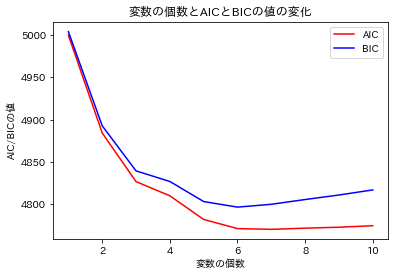

In [13]:
plt.plot(x_seq, AIC_seq, c="red", label="AIC")
plt.plot(x_seq, BIC_seq, c="blue", label="BIC")
plt.xlabel("変数の個数")
plt.ylabel("AIC/BICの値")
plt.title("変数の個数とAICとBICの値の変化")
plt.legend()

## 4.2 有効推定量とFisher情報量行列

## 4.3 Kullback-Leibler 情報量

## 4.4 赤池の情報量規準(AIC)の導出